<a href="https://colab.research.google.com/github/hklfach/Aplikasi-Berbasis-Platform/blob/master/Assignment3_1301202398_Muhamad_Fachri_Haikal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1301202398 - Muhamad Fachri Haikal

Klasifikasi data Cats vs Dogs menggunakan Artificial Neural Network (ANN)

### Library

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### Download Dataset Cats vs Dogs

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip
    
!unzip -q cats_and_dogs_filtered.zip

--2023-03-30 12:14:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 142.251.111.128, 142.251.163.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   144MB/s    in 0.5s    

2023-03-30 12:14:41 (144 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

replace cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


### Data Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'cats_and_dogs_filtered/train',  
        target_size=(150, 150),  
        batch_size=100,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'cats_and_dogs_filtered/validation',
        target_size=(150, 150),
        batch_size=100,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Create Model

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_shape=(150, 150, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])


Tidak seperti CNN, model ANN dibuat tanpa menggunakan layer convolution atau konvolusi 

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 150, 150, 16)      64        
                                                                 
 flatten_5 (Flatten)         (None, 360000)            0         
                                                                 
 dense_31 (Dense)            (None, 128)               46080128  
                                                                 
 dense_32 (Dense)            (None, 128)               16512     
                                                                 
 dense_33 (Dense)            (None, 512)               66048     
                                                                 
 dense_34 (Dense)            (None, 1)                 513       
                                                                 
Total params: 46,163,265
Trainable params: 46,163,265


### Model Training

In [ ]:
history = model.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator,
      shuffle=True,
      verbose=2)

Epoch 1/100
20/20 - 115s - loss: 6.4774 - accuracy: 0.5100 - val_loss: 2.0564 - val_accuracy: 0.5000 - 115s/epoch - 6s/step
Epoch 2/100
20/20 - 54s - loss: 1.7657 - accuracy: 0.5125 - val_loss: 1.2539 - val_accuracy: 0.5000 - 54s/epoch - 3s/step
Epoch 3/100
20/20 - 54s - loss: 0.8108 - accuracy: 0.5045 - val_loss: 0.7109 - val_accuracy: 0.5120 - 54s/epoch - 3s/step
Epoch 4/100
20/20 - 49s - loss: 0.6933 - accuracy: 0.5520 - val_loss: 0.6599 - val_accuracy: 0.5780 - 49s/epoch - 2s/step
Epoch 5/100
20/20 - 54s - loss: 0.6674 - accuracy: 0.5515 - val_loss: 0.6624 - val_accuracy: 0.5580 - 54s/epoch - 3s/step
Epoch 6/100
20/20 - 53s - loss: 0.6866 - accuracy: 0.5515 - val_loss: 0.6540 - val_accuracy: 0.5760 - 53s/epoch - 3s/step
Epoch 7/100
20/20 - 54s - loss: 0.6744 - accuracy: 0.5610 - val_loss: 0.7008 - val_accuracy: 0.5570 - 54s/epoch - 3s/step
Epoch 8/100
20/20 - 54s - loss: 0.6796 - accuracy: 0.5720 - val_loss: 0.6623 - val_accuracy: 0.5730 - 54s/epoch - 3s/step
Epoch 9/100
20/20 - 55

### Visualize Result

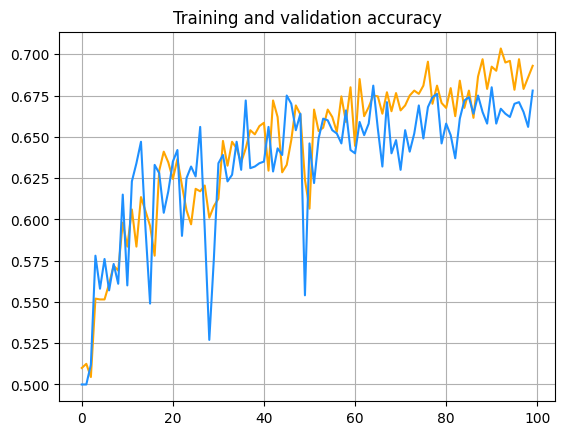

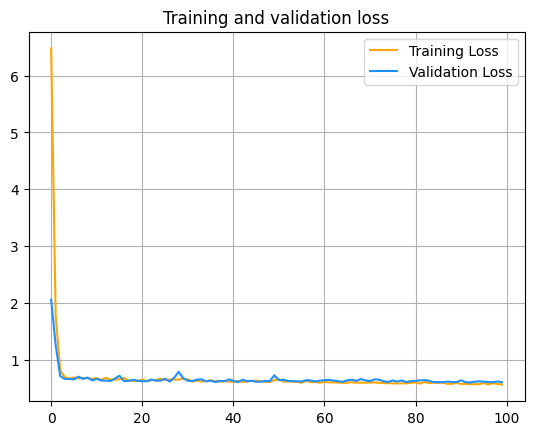

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc, 'dodgerblue', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.grid()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training Loss')
plt.plot(epochs, val_loss, 'dodgerblue', label='Validation Loss')
plt.title('Training and validation loss')
plt.grid()
plt.legend()

plt.show()